# Question 6

To derive the gradient of the regularized error function, we need to compute the derivative of E(w) with respect to w.

The regularized linear regression objective function is defined as follows:

$$
E\left(w\right)\ =\ \frac{1}{2}\sum_{n=1}^N\left(t_i\ -\ y\left(x_n,w\right)\right)^{2\ }\ +\ \frac{\lambda}{2}\left|w\right|^2
$$

Which we will derivate to get:

$$
\frac{\partial E\left(w\right)\ }{\partial w}=\frac{\partial\left( \frac{1}{2}\sum_{n=1}^N\left(t_i\ -\ y\left(x_n,w\right)\right)^{2\ }\ +\ \frac{\lambda}{2}\left|w\right|^2\right)}{\partial w}
$$

Using the chain rule, we can split this into two parts:

$$
\frac{\partial E\left(w\right)\ }{\partial w}=\frac{\partial\left(\frac{1}{2}\sum_{i=1}^N\left(_{ }t_n\ -\ y\left(x_n^{ },w\right)\right)^2\right)\ }{\partial w}+\ \frac{\partial\left(\frac{\lambda\left|w\right|^2}{2}\right)}{\partial w}
$$

Derivative of the Mean Squared Error (MSE) term and Derivative of the L2 regularization term is and using the chain rule we have:

$$
\frac{\partial E\left(w\right)\ }{\partial w}=\frac{2\sum_{i=1}^Nx_i\left(t_n\ -\ y\left(x_n^{ },w\right)\right)^{ }\ }{2}+\ \frac{2\lambda w}{2}
$$

The derivative of the L2 regularization term is straightforward:

$$
\frac{\partial E\left(w\right)\ }{\partial w}=-\sum_{i=1}^N\Phi\left(t_n\ -\ \Phi^{ }\right)^{ }\ +\ \lambda w
$$

Let

$$
\Phi =y\left(x_n,w\right)
$$

And to find the ideal weights, let

$$
\frac{\partial E\left(w\right)\ }{\partial w} = 0
$$

so by rearranging the terms

$$
w\ =\ \left(\lambda I\ +\ \Phi^T\Phi\right)\Phi^Tt
$$

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split


In [2]:
def f(x):
    return np.sin(5*np.pi*x)/(1+2*x)

def make_additive_noise_data(n, f, a, b, noise=0.1**0.5, random_state=None):
    RNG = np.random.default_rng(random_state)
    x = RNG.uniform(a, b, size=(n, 1))
    y = f(x) + RNG.normal(0, noise, size=(n, 1))
    return x, y

In [3]:
X_train,y_train = make_additive_noise_data(100, f, -0.3, 0.3, random_state=None)

In [4]:
X_test,y_test = make_additive_noise_data(10000, f, -0.3, 0.3, random_state=None)

In [13]:
class DirectRidgeRegressor:

    def __init__(self,lambd = .1):
        self.lambd = lambd 

    def fit(self, x, y):
        I = np.identity(x.shape[1]) #defining the identity matrix
        rhs = x.T.dot(y)
        lhs = x.T.dot(x) + self.lambd * I   #adding the regularization parameter
        self.coef_ = np.linalg.solve(lhs, rhs)  # find optimal weights w (coefficients) by solving system
        return self

    def predict(self, x):
        return x.dot(self.coef_)

In [14]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

lambda_values = np.geomspace(10**-10, 0.1, 101, endpoint=True)  #generating the lambda values

results = []
for lambda_param in lambda_values:  #looping through all the lambda values
    model = make_pipeline(       # Creating a pipeline with polynomial feature transformation with degree 5 and Ridge Regression
        PolynomialFeatures(degree=5),
        DirectRidgeRegressor(lambda_param)
    )
    
    model.fit(X_train, y_train)  #Fitting the data with the training data
    y_pred = model.predict(X_test)  #making the predictions on the test data
    mse = mean_squared_error(y_test, y_pred)  #calculating the mse for the lambda values
    results.append({'lambda': lambda_param, 'mse': mse})
    
for result in results:
    print(f"Lambda: {result['lambda']}, MSE: {result['mse']}")

Lambda: 1e-10, MSE: 0.11413957354205449
Lambda: 1.2302687708123812e-10, MSE: 0.11413961628734666
Lambda: 1.5135612484362072e-10, MSE: 0.11413966907331742
Lambda: 1.8620871366628656e-10, MSE: 0.11413973431351987
Lambda: 2.29086765276777e-10, MSE: 0.11413981502934434
Lambda: 2.8183829312644494e-10, MSE: 0.11413991501666755
Lambda: 3.46736850452531e-10, MSE: 0.11414003906455296
Lambda: 4.265795188015934e-10, MSE: 0.11414019324493775
Lambda: 5.248074602497734e-10, MSE: 0.11414038530022329
Lambda: 6.456542290346563e-10, MSE: 0.11414062516714753
Lambda: 7.943282347242822e-10, MSE: 0.11414092569228666
Lambda: 9.772372209558112e-10, MSE: 0.11414130361931553
Lambda: 1.2022644346174132e-09, MSE: 0.11414178096469088
Lambda: 1.4791083881682072e-09, MSE: 0.1141423869524598
Lambda: 1.8197008586099825e-09, MSE: 0.1141431607584982
Lambda: 2.2387211385683377e-09, MSE: 0.11414415543222078
Lambda: 2.7542287033381634e-09, MSE: 0.11414544353732888
Lambda: 3.3884415613920203e-09, MSE: 0.1141471253084878
Lam

In [15]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

lambda_values = np.geomspace(10**-10, 0.1, 101, endpoint=True)  #generating the lambda values
results = []

num_repetitions = 10  

for _ in range(num_repetitions):
    random_indices = np.random.choice(len(X_train), size=20, replace=False)  # selecting a sample of size 20 
    X_train_repeated = X_train[random_indices]  
    y_train_repeated = y_train[random_indices] 
    
    for lambda_param in lambda_values:  #looping through all the lambda values
        model = make_pipeline(
            (PolynomialFeatures(degree=5)),  #creating a pipeline with polynomial features of degree 5 and ridge regression
            (DirectRidgeRegressor(lambda_param))
        )
        model.fit(X_train_repeated, y_train_repeated) #fitting the model
        y_pred = model.predict(X_test)  #predicting the test data
        mse = mean_squared_error(y_test, y_pred)  # calculating the mse for each lambda 
        results.append({'lambda': lambda_param, 'mse': mse})
        
for result in results:
    print(f"Lambda: {result['lambda']}, MSE: {result['mse']}")


Lambda: 1e-10, MSE: 1.4637271623846568
Lambda: 1.2302687708123812e-10, MSE: 1.4597561380198294
Lambda: 1.5135612484362072e-10, MSE: 1.454887521641685
Lambda: 1.8620871366628656e-10, MSE: 1.4489231464881833
Lambda: 2.29086765276777e-10, MSE: 1.441623494081075
Lambda: 2.8183829312644494e-10, MSE: 1.4327002890523106
Lambda: 3.46736850452531e-10, MSE: 1.4218084079479527
Lambda: 4.265795188015934e-10, MSE: 1.4085374113798061
Lambda: 5.248074602497734e-10, MSE: 1.3924032748898927
Lambda: 6.456542290346563e-10, MSE: 1.3728412860454116
Lambda: 7.943282347242822e-10, MSE: 1.3492016300632734
Lambda: 9.772372209558112e-10, MSE: 1.320749935619991
Lambda: 1.2022644346174132e-09, MSE: 1.2866760066703096
Lambda: 1.4791083881682072e-09, MSE: 1.246115083246891
Lambda: 1.8197008586099825e-09, MSE: 1.1981871102066124
Lambda: 2.2387211385683377e-09, MSE: 1.1420603307116175
Lambda: 2.7542287033381634e-09, MSE: 1.0770454886161198
Lambda: 3.3884415613920203e-09, MSE: 1.0027251349160222
Lambda: 4.168693834703

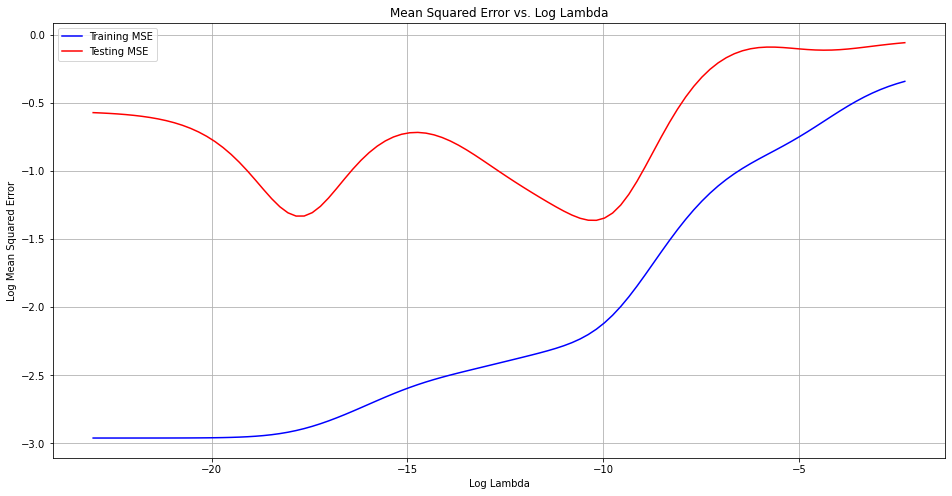

In [16]:
import matplotlib.pyplot as plt

lambda_values = np.geomspace(10**-10, 0.1, 101, endpoint=True)

training_mses = []  #initializing a list
testing_mses = []  #initializing a list

reps = 10

for iii in range(reps):
    idx = np.random.choice(len(X_train), size=20, replace=False) 
    X_train_new = X_train[idx]  
    y_train_new = y_train[idx]  
    
    training_mses_rep = [] #initializing a list
    testing_mses_rep = [] #initializing a list
    
    for lambda_param in lambda_values: 
        model = make_pipeline(          # Creating a pipeline
            (PolynomialFeatures(degree=5)),
            (DirectRidgeRegressor(lambda_param))
        )
        model.fit(X_train_new, y_train_new)  #fitting the data
        y_train_pred = model.predict(X_train_new)    #making training predictions
        training_mse = mean_squared_error(y_train_new, y_train_pred) #calculating mse for training data
        training_mses_rep.append(training_mse)
        y_test_pred = model.predict(X_test)  #making testing predictions
        testing_mse = mean_squared_error(y_test, y_test_pred)  #calculatng mse for testing data
        testing_mses_rep.append(testing_mse)
    training_mses.append(training_mses_rep)
    testing_mses.append(testing_mses_rep)

training_mses = np.array(training_mses) #changinf to numpy array
testing_mses = np.array(testing_mses)
mean_tr_mses = np.mean(training_mses, axis=0)
mean_tst_mses = np.mean(testing_mses, axis=0)

plt.figure(figsize=(16, 8))  #plotting plot
plt.plot(np.log(lambda_values), np.log(mean_tr_mses), label='Training MSE', color='blue')
plt.plot(np.log(lambda_values), np.log(mean_tst_mses), label='Testing MSE', color='red')
plt.xlabel('Log Lambda')   
plt.ylabel('Log Mean Squared Error') 
plt.title('Mean Squared Error vs. Log Lambda')   
plt.legend()
plt.grid(True)
plt.show()
